# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


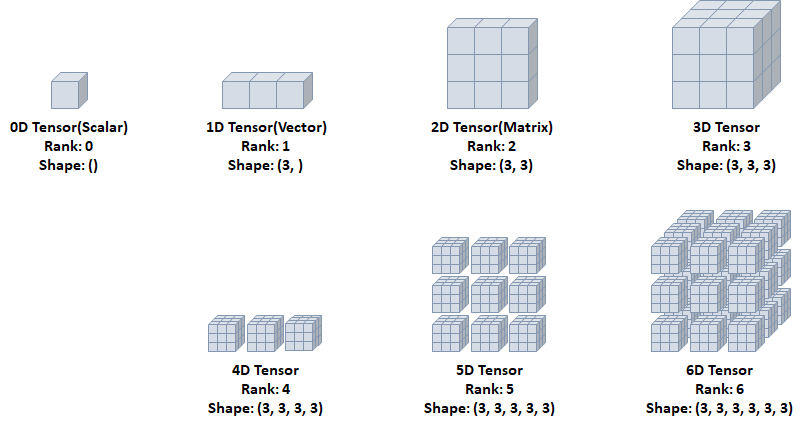

In [1]:
import torch
torch.__version__

'1.10.0+cu111'

In [2]:
# 텐서 초기화와 데이터 타입
x = torch.empty(4,2)
x

tensor([[8.0700e+20, 3.0934e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 1.1362e+30]])

In [5]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.6897, 0.6858],
        [0.7683, 0.7736],
        [0.7341, 0.1181],
        [0.8410, 0.1225]])

In [7]:
# 데이터 타입이 long이고 0으로 채원진 텐서
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [8]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [12]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
# 2 x 4 크기, double 탕비, 1로 채워진 텐서
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [13]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.8277, -0.4621,  1.6034,  0.0909],
        [ 0.4048, -0.0752, -0.9230,  1.4234]])


In [14]:
# 텐서의 크기 계산
x.size()

torch.Size([2, 4])

In [15]:
x.shape

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


A signed integer is a 32-bit datum that encodes an integer in the range [-2147483648 to 2147483647]

unsigned int는 양수만 저장한다. 때문에 부호에 비트를 사용하지 않아 저장 가능한 양수의 범위를 두 배로 늘인다. signed int보다 더 넓은 범위의 양수(0~4,294,967,295)를 표현할 수 있지만 실제 표현 가능한 개수는 음수를 포함한 signed int와 동일하다.

In [17]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [18]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [19]:
it = torch.IntTensor([1,2,3])
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [21]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떻한 장치(cpu, gpu)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4806])
0.4805990755558014
torch.float32


In [22]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [23]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

tensor([1.], device='cuda:0')
tensor([0.4806], device='cuda:0')
tensor([1.4806], device='cuda:0')
tensor([1.4806], dtype=torch.float64)


In [24]:
# 다차원 텐서 표현

#0D Tensor(Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [25]:
# 1D Tensor
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [27]:
# 2D Tensor
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3, 4, 5차원 텐서를 생성하여 출력하세요.

In [29]:
# 텐서의 연산

import math
a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5,0.5))

tensor([[0.6327, 1.7405]])
tensor([[0.6327, 1.7405]])
tensor([[1., 2.]])
tensor([[0., 1.]])
tensor([[0.5000, 0.5000]])


In [30]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[0.6327, 1.7405]])
tensor(0.6327)
tensor(1.7405)
tensor(1.1866)
tensor(0.7833)
tensor(1.1013)
tensor([1, 2, 3])


[과제] 2차원 텐서 x,y를 생성하여 덧셈(add), 뺄셈(sub), 곱셈(mul), 나눗셈(div), 내적(matmul, mm) 연산 사례를 pytorch로 1개 이상씩 수행하세요.